Fitbit data for one individual.  Looks like a he/she left it off from time to time.  Assuming sleep and work for monday through friday, 2/3 of the day is sedentary.  

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import itertools
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from fbprophet import Prophet
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire

### Acquired fitbit data via acuire.py

In [35]:
df = acquire.get_fitbit_data()

In [36]:
df.shape

(225, 10)

### Rename columns to make them easier to use

In [37]:
df = df.rename(columns = {'Date':'date', 'Calories Burned':'calories_burned', 'Steps':'steps', 'Distance':'distance', 'Floors':'floors', 'Minutes Sedentary':'minutes_sedentary', 'Minutes Lightly Active':'minutes_lightly_active', 'Minutes Fairly Active':'minutes_fairly_active', 'Minutes Very Active':'minutes_very_active', 'Activity Calories':'activity_calories'})
df.head(1)

,date,calories_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
date                      225 non-null object
calories_burned           225 non-null object
steps                     225 non-null object
distance                  225 non-null float64
floors                    225 non-null int64
minutes_sedentary         225 non-null object
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


### Change object types into floats

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
date                      225 non-null object
calories_burned           225 non-null object
steps                     225 non-null object
distance                  225 non-null float64
floors                    225 non-null int64
minutes_sedentary         225 non-null object
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


In [40]:
df.calories_burned = df.calories_burned.astype(str)
df.calories_burned = df.calories_burned.str.replace(',', '').astype(float)

df.minutes_sedentary = df.minutes_sedentary.astype(str)
df.minutes_sedentary = df.minutes_sedentary.str.replace(',', '').astype(float)

df.activity_calories = df.activity_calories.astype(str)
df.activity_calories = df.activity_calories.str.replace(',', '').astype(float)

df.steps = df.steps.astype(str)
df.steps = df.steps.str.replace(',', '').astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
date                      225 non-null object
calories_burned           225 non-null float64
steps                     225 non-null float64
distance                  225 non-null float64
floors                    225 non-null int64
minutes_sedentary         225 non-null float64
minutes_lightly_active    225 non-null int64
minutes_fairly_active     225 non-null int64
minutes_very_active       225 non-null int64
activity_calories         225 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 17.7+ KB


### Visualize data

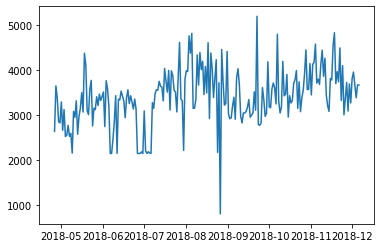

In [53]:
plt.plot('ds', 'y',data=df1)

### Set column names to 'ds' and 'y' in order to feed into Prophet

In [44]:
df1 = df[['date', 'calories_burned']]
df1.columns = ['ds', 'y']

In [45]:
df1.head()

,ds,y
0,4/26/18,2635.0
1,4/27/18,3649.0
2,4/28/18,3379.0
3,4/29/18,2851.0
4,4/30/18,2825.0


In [46]:
df1.ds = pd.to_datetime(df1.ds)
# df1 = df1.set_index(df1.ds).drop(columns='ds')

In [47]:
df1.head()

,ds,y
0,2018-04-26,2635.0
1,2018-04-27,3649.0
2,2018-04-28,3379.0
3,2018-04-29,2851.0
4,2018-04-30,2825.0


In [48]:
len(df)

225

### Split into Train and Test

In [49]:
train = df1.iloc[:211]
test = df1.iloc[211:]

### Create Prophet object, fit, and predict

In [50]:
m = Prophet()

m.fit(df1)

#Create a placeholder dataframe

future = m.make_future_dataframe(periods=14)

forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
forecast.tail(14)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
225,2018-12-07,3813.061362,3211.610124,4618.544413,3813.061362,3813.061362,71.917416,71.917416,71.917416,71.917416,71.917416,71.917416,0.0,0.0,0.0,3884.978778
226,2018-12-08,3816.570036,3244.139700,4673.841933,3816.568686,3816.570716,156.333326,156.333326,156.333326,156.333326,156.333326,156.333326,0.0,0.0,0.0,3972.903362
227,2018-12-09,3820.078711,3290.076364,4744.766836,3820.067741,3820.093767,150.900388,150.900388,150.900388,150.900388,150.900388,150.900388,0.0,0.0,0.0,3970.979099
228,2018-12-10,3823.587386,2930.324536,4409.363615,3823.556732,3823.622279,-160.454654,-160.454654,-160.454654,-160.454654,-160.454654,-160.454654,0.0,0.0,0.0,3663.132732
229,2018-12-11,3827.096060,3019.790492,4391.007803,3827.044641,3827.149870,-103.044035,-103.044035,-103.044035,-103.044035,-103.044035,-103.044035,0.0,0.0,0.0,3724.052025
230,2018-12-12,3830.604735,2910.345749,4409.940261,3830.530630,3830.693661,-140.269280,-140.269280,-140.269280,-140.269280,-140.269280,-140.269280,0.0,0.0,0.0,3690.335455
231,2018-12-13,3834.113410,3140.030666,4640.609369,3834.015282,3834.235912,24.616840,24.616840,24.616840,24.616840,24.616840,24.616840,0.0,0.0,0.0,3858.730250
232,2018-12-14,3837.622085,3206.393482,4588.193556,3837.492002,3837.784816,71.917416,71.917416,71.917416,71.917416,71.917416,71.917416,0.0,0.0,0.0,3909.539501
233,2018-12-15,3841.130759,3273.461962,4714.292233,3840.964182,3841.323947,156.333326,156.333326,156.333326,156.333326,156.333326,156.333326,0.0,0.0,0.0,3997.464085
234,2018-12-16,3844.639434,3254.927669,4688.134743,3844.430946,3844.860139,150.900388,150.900388,150.900388,150.900388,150.900388,150.900388,0.0,0.0,0.0,3995.539822


In [52]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [18]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(14)

,ds,yhat_lower,yhat_upper,yhat
225,2018-12-07,3138.631016,4615.137906,3884.978778
226,2018-12-08,3276.527054,4737.476357,3972.903362
227,2018-12-09,3262.488564,4702.510500,3970.979099
228,2018-12-10,2916.817358,4389.527992,3663.132732
229,2018-12-11,2977.638371,4449.953090,3724.052025
230,2018-12-12,2948.291795,4369.342871,3690.335455
231,2018-12-13,3154.815680,4583.690458,3858.730250
232,2018-12-14,3175.026328,4582.357353,3909.539501
233,2018-12-15,3221.394734,4698.195084,3997.464085
234,2018-12-16,3249.610805,4639.418590,3995.539822


In [19]:
df1.head(1)

,ds,y
0,2018-04-26,2635.0


### Validation:  Compare Predictions to Actual data with Root Mean Square Error

In [54]:
from statsmodels.tools.eval_measures import rmse

In [55]:
predictions = forecast.iloc[-14:]['yhat']

In [56]:
predictions

225    3884.978778
226    3972.903362
227    3970.979099
228    3663.132732
229    3724.052025
230    3690.335455
231    3858.730250
232    3909.539501
233    3997.464085
234    3995.539822
235    3687.693455
236    3748.612748
237    3714.896179
238    3883.290973
Name: yhat, dtype: float64

In [57]:
test.y

211    3325.0
212    4098.0
213    3005.0
214    3364.0
215    3726.0
216    3088.0
217    3693.0
218    3269.0
219    3813.0
220    3957.0
221    3660.0
222    3384.0
223    3670.0
224    3669.0
Name: y, dtype: float64

In [58]:
rmse(predictions, test.y)

411.4042643009861

In [59]:
test.mean()

y    3551.5
dtype: float64

In [60]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-04-26,2961.521139,2184.543288,3656.114343,2961.521139,2961.521139,24.616840,24.616840,24.616840,24.616840,24.616840,24.616840,0.0,0.0,0.0,2986.137979
1,2018-04-27,2965.668012,2350.471849,3794.883871,2965.668012,2965.668012,71.917416,71.917416,71.917416,71.917416,71.917416,71.917416,0.0,0.0,0.0,3037.585428
2,2018-04-28,2969.814885,2349.317165,3836.876500,2969.814885,2969.814885,156.333326,156.333326,156.333326,156.333326,156.333326,156.333326,0.0,0.0,0.0,3126.148210
3,2018-04-29,2973.961758,2418.770944,3852.172552,2973.961758,2973.961758,150.900388,150.900388,150.900388,150.900388,150.900388,150.900388,0.0,0.0,0.0,3124.862145
4,2018-04-30,2978.108631,2086.106002,3555.035517,2978.108631,2978.108631,-160.454654,-160.454654,-160.454654,-160.454654,-160.454654,-160.454654,0.0,0.0,0.0,2817.653977
5,2018-05-01,2982.255504,2134.485950,3621.974218,2982.255504,2982.255504,-103.044035,-103.044035,-103.044035,-103.044035,-103.044035,-103.044035,0.0,0.0,0.0,2879.211468
6,2018-05-02,2986.402376,2106.721559,3608.843292,2986.402376,2986.402376,-140.269280,-140.269280,-140.269280,-140.269280,-140.269280,-140.269280,0.0,0.0,0.0,2846.133097
7,2018-05-03,2990.549249,2267.745661,3761.557965,2990.549249,2990.549249,24.616840,24.616840,24.616840,24.616840,24.616840,24.616840,0.0,0.0,0.0,3015.166089
8,2018-05-04,2994.696122,2377.355502,3815.435585,2994.696122,2994.696122,71.917416,71.917416,71.917416,71.917416,71.917416,71.917416,0.0,0.0,0.0,3066.613538
9,2018-05-05,2998.842995,2390.261260,3884.846614,2998.842995,2998.842995,156.333326,156.333326,156.333326,156.333326,156.333326,156.333326,0.0,0.0,0.0,3155.176320


### Visualize Predictions vs True Test Data

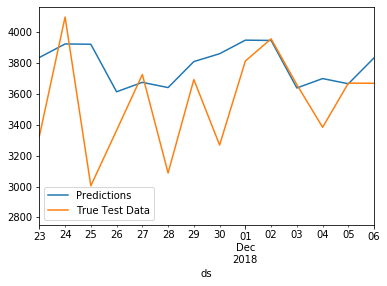

In [28]:
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-11-23', '2018-12-06'))
